In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings 
import sklearn
warnings.filterwarnings('ignore')

C:\Users\mervi\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv('mushroom.csv')
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [3]:
df.columns

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x1cb468c3ed0>,
 [Text(-0.24099194101762916, 0.33169697671904635, 'poisonous'),
  Text(0.2409919410176291, -0.33169697671904635, 'edible')],
 [Text(-0.3585489854164727, 0.4935003799966298, '70%'),
  Text(0.35854898541647257, -0.49350037999662993, '30%')])

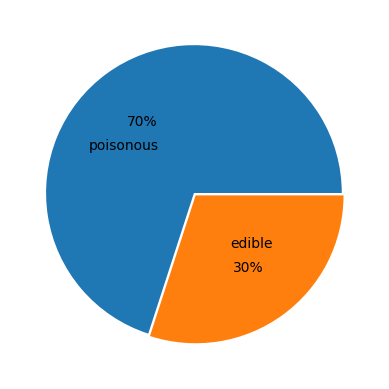

In [4]:
plt.pie(df['class'].value_counts(),autopct='%0.f%%',labels=['poisonous','edible'],labeldistance=0.4,explode=(0.01,0.01),)

In [5]:
df.isna().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [6]:
df.shape

(2000, 26)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [8]:
df.duplicated().sum()

1024

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(976, 26)

([<matplotlib.patches.Wedge at 0x1cb4680bd10>,
 [Text(-0.16660124613057728, 0.3746251790626717, 'poisonous'),
  Text(0.16660124613057725, -0.37462517906267173, 'edible')],
 [Text(-0.24787014668207838, 0.5573691688493407, '63%'),
  Text(0.2478701466820783, -0.5573691688493408, '37%')])

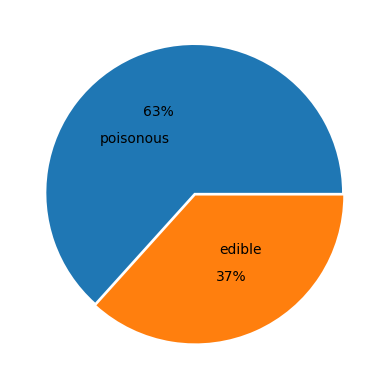

In [11]:
plt.pie(df['class'].value_counts(),autopct='%0.f%%',labels=['poisonous','edible'],labeldistance=0.4,explode=(0.01,0.01),)

In [12]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [13]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = label.fit_transform(df[column])

In [14]:

features=df.drop(['class','Unnamed: 0'],axis=1)

In [15]:
target=df['class']

In [16]:
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.75,random_state=100)

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(732, 24)
(244, 24)
(732,)
(244,)


In [18]:
from sklearn.svm import SVC

In [19]:
svm = SVC(random_state=42, gamma="auto")
svm.fit(x_train, y_train)

print("Test Accuracy: {}%".format(round(svm.score(x_test, y_test)*100, 2)))

Test Accuracy: 59.02%


In [20]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred_svm = svm.predict(x_test)
print("SVM Classifier report: \n\n", classification_report(y_test, y_pred_svm))

SVM Classifier report: 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.59      1.00      0.74       144

    accuracy                           0.59       244
   macro avg       0.30      0.50      0.37       244
weighted avg       0.35      0.59      0.44       244



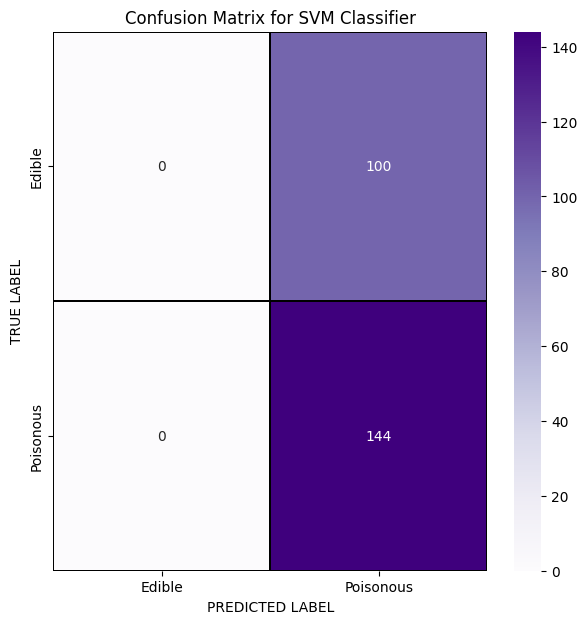

In [21]:
cm = confusion_matrix(y_test, y_pred_svm)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SVM Classifier')
#plt.savefig("svmcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

In [22]:
params={'C':[1,2,3,4,5,6,10,12],'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'gamma':[0.1,0.2,0.3,0.4]}

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
grid_searc= GridSearchCV(support,params,verbose=2)

In [ ]:
grid_searc.fit(x_train,y_train)

In [ ]:
grid_searc.best

In [ ]:
grid_searc.best_params_